In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import random
from sklearn.model_selection import train_test_split

In [6]:
random.seed(1000)

In [3]:
dt = pd.read_csv("final_data20180707.csv")

In [1]:
dt['습도','기온'].head()

NameError: name 'dt' is not defined

In [7]:
dt.columns

Index(['거리', '링크아이디', '방향', '요일', '일자', '시간', '속도', 'LANES', 'MAX_SPD',
       '강수_y', '습도', '기온', '하늘상태', '강수형태', '공공용', '공업용',
       '기타', '농수산용', '문교사회용', '상업용', '주거용'],
      dtype='object')

In [8]:
dt.shape

(33970014, 21)

In [9]:
dt.columns = [['dist','linkId','direction','weekday','date','hour','speed','lanes','max_speed',
               'prep','humid','temp','skyCon','prepCon','public','industrial',
               'etc','agriMarin','cultural','commercial','residental']]

In [10]:
dt2 = dt[["dist","date","hour","lanes","max_speed","prep","humid","temp","skyCon","prepCon","public","industrial","cultural","agriMarin",
          "commercial","residental","etc",'weekday',"speed"]]

## EDA

In [10]:
dt2.dtypes

dist            int64
hour            int64
lanes         float64
max_speed     float64
prep          float64
humid         float64
temp          float64
skyCon        float64
prepCon       float64
public        float64
industrial    float64
cultural      float64
agriMarin     float64
commercial    float64
residental    float64
etc           float64
weekday        object
speed         float64
dtype: object

In [11]:
dt2.columns

Index(['dist', 'date', 'hour', 'lanes', 'max_speed', 'prep', 'humid', 'temp',
       'skyCon', 'prepCon', 'public', 'industrial', 'cultural', 'agriMarin',
       'commercial', 'residental', 'etc', 'weekday', 'speed'],
      dtype='object')

In [12]:
catagorial_feature_names = ['lanes','skyCon','prepCon','weekday']

for var in catagorial_feature_names :
    dt2[var] = dt2[var].astype("category")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### speed 0 없애기

In [13]:
dt2.shape

(33970014, 19)

In [14]:
con1 = dt2['speed'] !=0

dt2 = dt2[con1]

In [15]:
dt2.shape

(33759655, 19)

In [16]:
dt2 = dt2.dropna(axis=0)

In [17]:
dt2.shape

(9385581, 19)

#### csv out

In [63]:
dt2.to_csv('dt2_9385581.csv')

In [12]:
dt2 = pd.read_csv("dt2_9385581.csv")

### EDA continue

In [13]:
catagorial_feature_names = ['lanes','skyCon','prepCon','weekday']

for var in catagorial_feature_names :
    dt2[var] = dt2[var].astype("category")

In [14]:
dt2 = pd.get_dummies(dt2)

In [15]:
dt2.columns

Index(['Unnamed: 0', 'dist', 'date', 'hour', 'max_speed', 'prep', 'humid',
       'temp', 'public', 'industrial', 'cultural', 'agriMarin', 'commercial',
       'residental', 'etc', 'speed', 'lanes_1.0', 'lanes_2.0', 'lanes_3.0',
       'lanes_4.0', 'lanes_5.0', 'lanes_6.0', 'lanes_7.0', 'skyCon_1.0',
       'skyCon_2.0', 'skyCon_3.0', 'skyCon_4.0', 'prepCon_0.0', 'prepCon_1.0',
       'prepCon_2.0', 'prepCon_3.0', 'weekday_금', 'weekday_목', 'weekday_수',
       'weekday_월', 'weekday_일', 'weekday_토', 'weekday_화'],
      dtype='object')

In [16]:
dt2 = dt2.drop(['Unnamed: 0','dist','date'],axis=1)

### divide train and test (skip 1 code)

In [17]:
speed = np.array(dt2['speed'])

dt3 = dt2.drop('speed',axis=1)

dt3_list = list(dt3.columns)

dt3 = np.array(dt3)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(dt2, speed, test_size=0.2)

In [20]:
X_train = dt2[(dt2.date >= 20170301) & (dt2.date < 20180301)] # split data
X_test = dt2[(dt2.date >= 20180301) & (dt2.date < 20180331)]
y_train = np.array(X_train['speed'])
X_train = X_train.drop('speed',axis=1)
y_test = np.array(X_test['speed'])
X_test = X_test.drop('speed',axis=1)
X_list = list(X_train.columns)

In [19]:
print('Training dt3 Shape:', X_train.shape)
print('Training speed Shape:', y_train.shape)
print('Testing dt3 Shape:', X_test.shape)
print('Testing speed Shape:', y_test.shape)

Training dt3 Shape: (7508464, 35)
Training speed Shape: (7508464,)
Testing dt3 Shape: (1877117, 35)
Testing speed Shape: (1877117,)


#### randomForest

In [54]:
max_depth_list = []
rf = RandomForestRegressor(n_estimators = 100, random_state = 0,max_features = 3)

#### k fold cross validation(skip)

In [71]:
k_fold = KFold(n_splits = 10,shuffle = True, random_state=0)

In [55]:
%time score = cross_val_score(rf, train_dt3, train_speed, cv = k_fold, scoring = 'neg_mean_squared_error')
score = score.mean()

print("Score = {0:.5f}".format(score))

NameError: name 'train_dt3' is not defined

NameError: name 'score' is not defined

In [56]:
%time rf.fit(X_train, y_train)

CPU times: user 28min 42s, sys: 2min 7s, total: 30min 49s
Wall time: 30min 58s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [57]:
predictions = rf.predict(X_test)

#### skip

In [58]:

print("훈련 세트 정확도: {:.3f}".format(rf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rf.score(X_test, y_test)))

훈련 세트 정확도: 0.999
테스트 세트 정확도: 0.996


### RMSLE

In [52]:
def rmsle(y,y_, convertExp = True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v+1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v+1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [59]:
rmsle(predictions,y_test,convertExp = False)

0.04150156630016779

### RMSE

In [75]:
mean_squared_error(y_test, predictions)**0.5

0.38551332606989513

In [27]:
r2_test = r2_score(y_test, predictions)

In [28]:
print(r2_test)

0.894161301693


### graph

In [29]:
import matplotlib.pyplot as plt

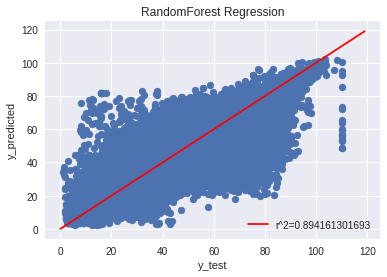

In [30]:
plt.scatter(y_test,predictions)
plt.plot(np.arange(0, 120), np.arange(0,120), label="r^2=" + str(r2_test), c="r")
plt.legend(loc="lower right")
plt.title("RandomForest Regression")
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.show()

In [46]:
y_test.max()

114.33

### MAPE

In [83]:
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 82.49 %.


### variable importance

In [37]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(dt3_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: dist                 Importance: 0.25
Variable: max_speed            Importance: 0.24
Variable: hour                 Importance: 0.09
Variable: cultural             Importance: 0.08
Variable: commercial           Importance: 0.08
Variable: residental           Importance: 0.06
Variable: temp                 Importance: 0.04
Variable: humid                Importance: 0.03
Variable: industrial           Importance: 0.02
Variable: etc                  Importance: 0.02
Variable: lanes_2.0            Importance: 0.02
Variable: public               Importance: 0.01
Variable: lanes_1.0            Importance: 0.01
Variable: lanes_4.0            Importance: 0.01
Variable: lanes_5.0            Importance: 0.01
Variable: weekday_일            Importance: 0.01
Variable: weekday_토            Importance: 0.01
Variable: prep                 Importance: 0.0
Variable: agriMarin            Importance: 0.0
Variable: lanes_3.0            Importance: 0.0
Variable: lanes_6.0            Importance: 

### importance visualization

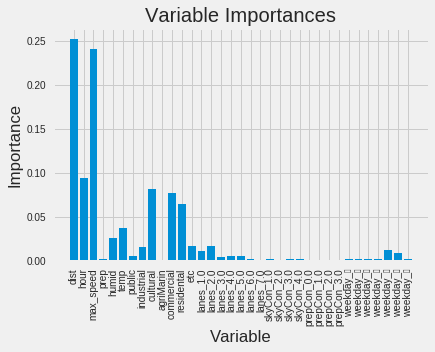

In [38]:
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, dt3_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### lightGBM

In [66]:
import lightgbm

ModuleNotFoundError: No module named 'lightgbm'

In [63]:

def run_lgb(X_train, Y_train, X_valid, Y_valid, x_test):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "task": "train",
        "boosting type":'dart',
        "num_leaves" :50,
        "learning_rate" : 0.01,
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 6,
        "bagging_seed" : 42,
        "verbosity" : -1,
        "seed": 42
    }
    
    lgtrain = lgb.Dataset(X_train, label=Y_train)
    lgval = lgb.Dataset(X_valid, label=Y_valid)
    evals_result = {}
    model = lgb.train(params, lgtrain, 5000, 
                      valid_sets=[lgtrain, lgval], 
                      early_stopping_rounds=300, 
                      verbose_eval=100, 
                      evals_result=evals_result)
    
    lgb_prediction = np.expm1(model.predict(x_test, num_iteration=model.best_iteration))
    return lgb_prediction, model, evals_result

In [61]:
X_train, X_test, y_train, y_test = train_test_split(dt3, time, test_size=0.2, random_state=1)

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
lgb_pred, model, evals_result = run_lgb(X_train, Y_train, X_valid, Y_valid, x_test)
print("LightGBM Training Completed...")